SPLIT add two columns to LePHARE:
 - pdz_flag: describes the quality of the computed redshift
 - s-type: the most likely type of star (OBAFGKM) if the observed source was a star


In [18]:
###Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib widget
# %matplotlib inline

###This notebook essentially uses the output catalog from zphota
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..')) #change to your lephare base_dir
# CAT_OUT = os.path.join(base_dir, 'simulation_catalogs/star_gal/DC1_Buzzard_PICKLES_DES_typed.out')
CAT_OUT = os.path.join(base_dir, 'simulation_catalogs/star_gal/DESstars_Buzzard_PICKLES_DES_typed.out')

##Transform commented header into header for pandas dataframe
#extract header (line 47 in data file)
with open(CAT_OUT, "r") as f:
    lines = f.readlines()
    header_line = None
    for line in lines:
        if line.startswith("# IDENT  Z_BEST"): #line used for the header, always starts like this
            header_line = line
            break

#add header to column names
if header_line:
    column_names = header_line.strip("#").strip().split()

#displays data
zphota = pd.read_csv(CAT_OUT, sep='\s+', comment="#", header=None, names=column_names) #aphota dataframe
print(len(zphota))
print(list(zphota.columns.values))
zphota

<>:29: SyntaxWarning: invalid escape sequence '\s'
<>:29: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_52331/1933956059.py:29: SyntaxWarning: invalid escape sequence '\s'
  zphota = pd.read_csv(CAT_OUT, sep='\s+', comment="#", header=None, names=column_names) #aphota dataframe


100000
['IDENT', 'Z_BEST', 'Z_MED', 'Z_MODE', 'CHI_BEST', 'MOD_BEST', 'SCALE_BEST', 'NBAND_USED', 'Z_SEC', 'CHI_SEC', 'MOD_STAR', 'CHI_STAR', 'MAG_OBS0', 'MAG_OBS1', 'MAG_OBS2', 'MAG_OBS3', 'MAG_OBS4', 'ERR_MAG_OBS0', 'ERR_MAG_OBS1', 'ERR_MAG_OBS2', 'ERR_MAG_OBS3', 'ERR_MAG_OBS4', 'ZSPEC', 'PDZ_FLAG', 'S_TYPE']


,IDENT,Z_BEST,Z_MED,Z_MODE,CHI_BEST,MOD_BEST,SCALE_BEST,NBAND_USED,Z_SEC,CHI_SEC,...,MAG_OBS3,MAG_OBS4,ERR_MAG_OBS0,ERR_MAG_OBS1,ERR_MAG_OBS2,ERR_MAG_OBS3,ERR_MAG_OBS4,ZSPEC,PDZ_FLAG,S_TYPE
0,13525079,0.2842,0.2800,0.2800,1664.100000,91,2.667450,5,-99.9,1.000000e+09,...,17.598,17.622,0.001,0.001,0.001,0.001,0.003,-99.9,-99,"star,g0v"
1,19197913,0.2824,0.2792,0.2800,3659.650000,91,5.815280,5,-99.9,1.000000e+09,...,16.735,16.756,0.001,0.001,0.001,0.001,0.003,-99.9,-99,"star,g0v"
2,9325901,0.5407,0.2873,0.5402,1.605810,54,1.317240,4,-99.9,1.000000e+09,...,20.074,99.000,0.011,0.005,0.005,0.011,99.000,-99.9,9,"star,k5v"
3,17848488,0.5600,0.5678,0.5600,36.587500,17,3.600330,5,-99.9,1.000000e+09,...,19.296,19.213,0.014,0.005,0.005,0.005,0.014,-99.9,8,"star,m2v"
4,22020959,0.1504,0.1500,0.1500,62.061300,97,0.291388,4,-99.9,1.000000e+09,...,18.533,18.584,0.002,0.002,0.002,0.002,0.008,-99.9,0,"star,f0i"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,29477335,0.5985,0.6000,0.6000,1557.170000,1,6.923330,5,-99.9,1.000000e+09,...,18.905,18.762,0.019,0.005,0.005,0.003,0.006,-99.9,-99,"star,m3v"
99996,13924904,0.2165,0.2200,0.2200,135046.000000,1,6.509310,3,-99.9,1.000000e+09,...,15.908,15.809,0.002,0.001,0.001,0.001,0.001,-99.9,-99,"star,m2v"
99997,8101945,0.5442,0.5446,0.5465,0.702202,69,0.729401,4,-99.9,1.000000e+09,...,20.663,99.000,0.015,0.007,0.007,0.014,99.000,-99.9,0,"star,k3iii"
99998,6614261,0.1636,0.1600,0.1600,6445.860000,1,1.930980,3,-99.9,1.000000e+09,...,16.677,16.574,0.004,0.001,0.001,0.001,0.002,-99.9,-99,"-99,None"


Reminder of the sample

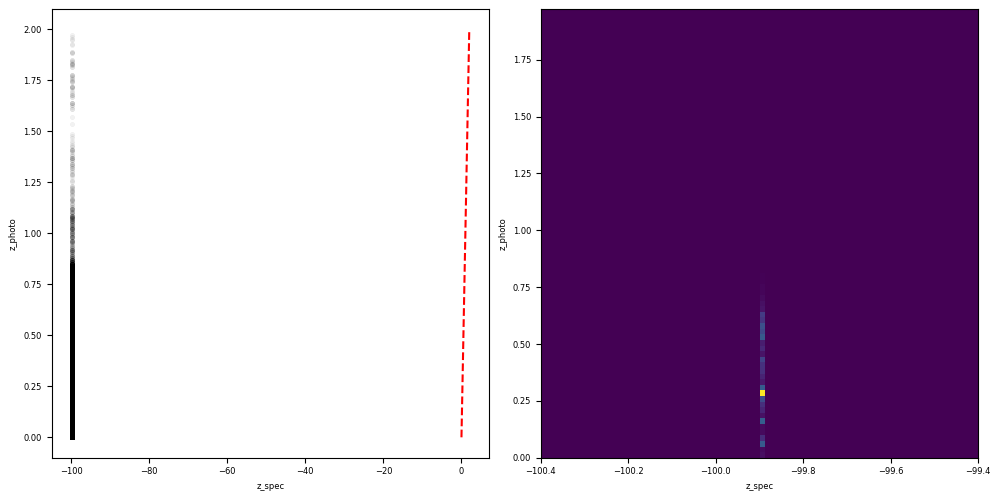

In [19]:
### First look at photometric redshift from output file
# flag_mask = zphota['PDZ_FLAG'] >=16# can apply flag mask if the ouput catalog has been pass through the pdz_flagger.py script
z_photo = zphota['Z_MODE']#[flag_mask] #computed photo z 
z_spec = zphota['ZSPEC']#[flag_mask] #initial "true" z


### z_spec vs z_phota
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(z_spec, z_photo, linewidth=0.3, s=10, alpha=0.05, c='k') #zz-plot


plt.plot([0, 2], [0, 2], 'r--') #1:1 scale line, corresponding to perfectly computed photometric redshift
plt.xlabel("z_spec")
plt.ylabel("z_photo")
# plt.title("photometric vs true redshift")
# plt.grid(True)

###Color map
plt.subplot(122)
plt.hist2d(z_spec, z_photo, bins=80, cmap='viridis')
plt.plot([0, 2], [0, 2], 'r--')
plt.xlabel("z_spec")
plt.ylabel("z_photo")
# plt.title("photometric vs true redshift")
# plt.colorbar()

plt.tight_layout()
plt.show()

flag VS stype

/tmp/ipykernel_52331/3710832725.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


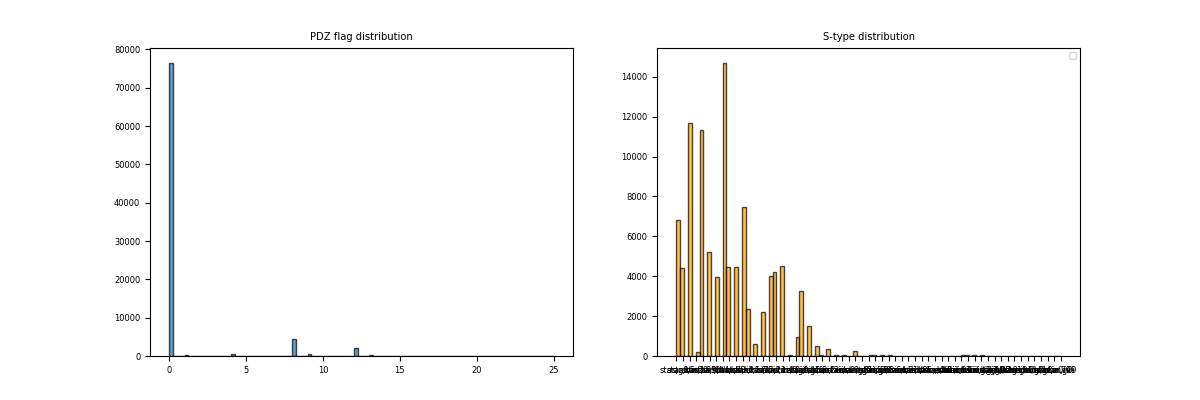

In [20]:
###Flag and type distribution

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.hist(zphota["PDZ_FLAG"][zphota["PDZ_FLAG"]>=0], bins=100, alpha=0.7, edgecolor='black')#, density=True)#, log=True)
plt.title("PDZ flag distribution")
plt.subplot(122)
plt.title("S-type distribution")
plt.hist(zphota["S_TYPE"], bins=100, alpha=0.7, edgecolor='black', color='orange')#, density=True)#, log=True)

# plt.ylim(0,0.010)
plt.legend()
plt.show()

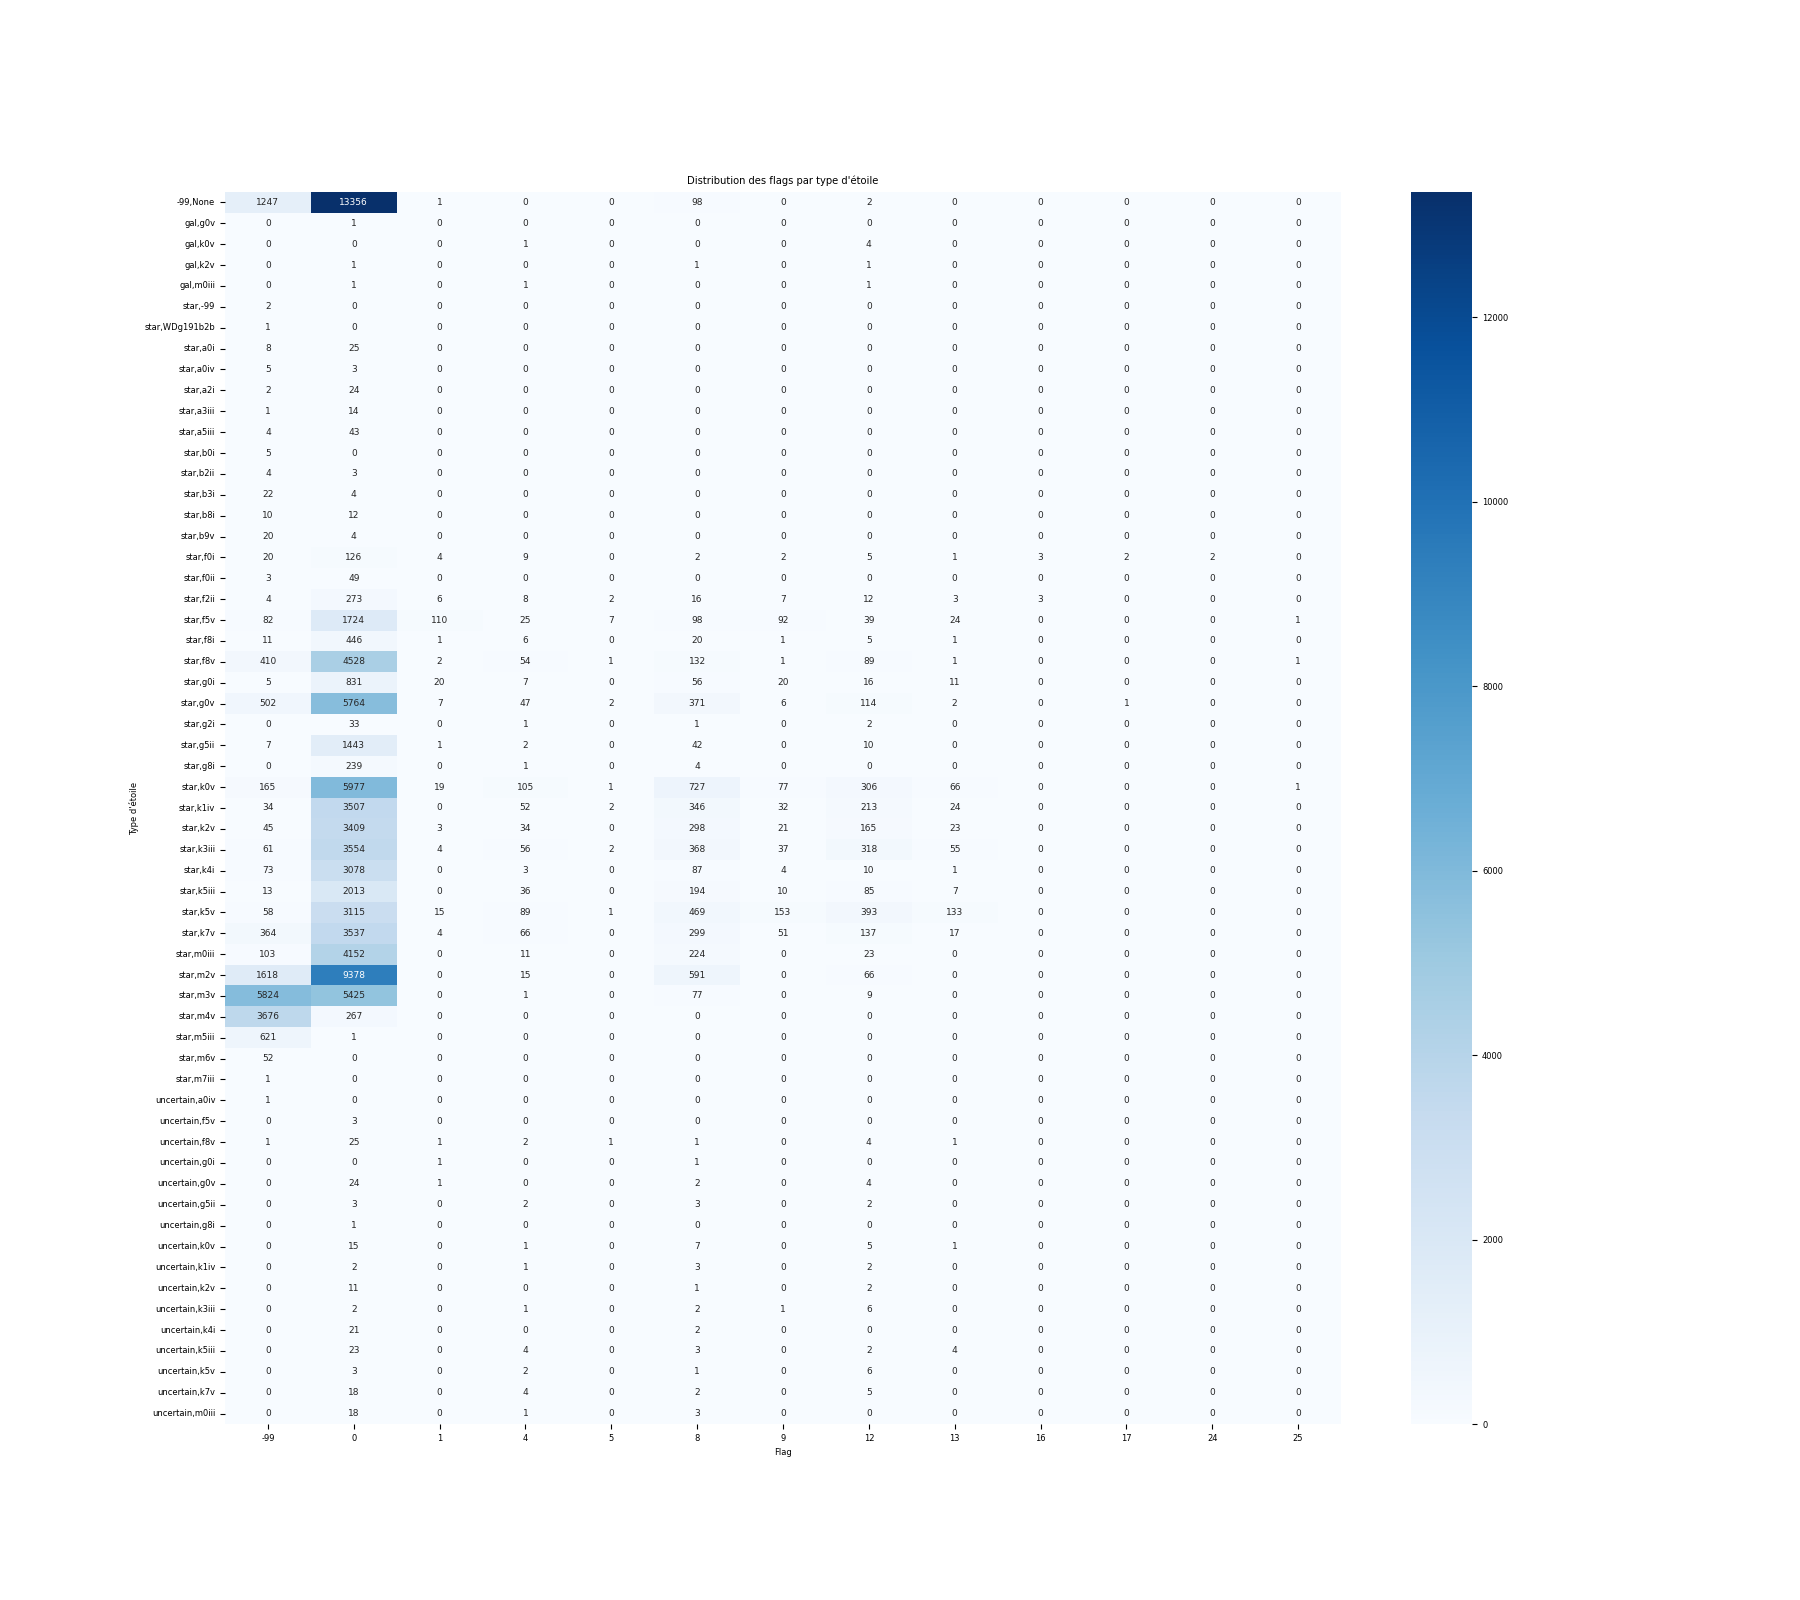

In [22]:
import seaborn as sns
plt.rcParams.update({'font.size': 6})
contingency = pd.crosstab(zphota["S_TYPE"], zphota["PDZ_FLAG"])

# Plot avec seaborn
plt.figure(figsize=(18,16))
sns.heatmap(contingency, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 6.5})
plt.title("Distribution des flags par type d'étoile")
plt.ylabel("Type d'étoile")
plt.xlabel("Flag")
plt.show()


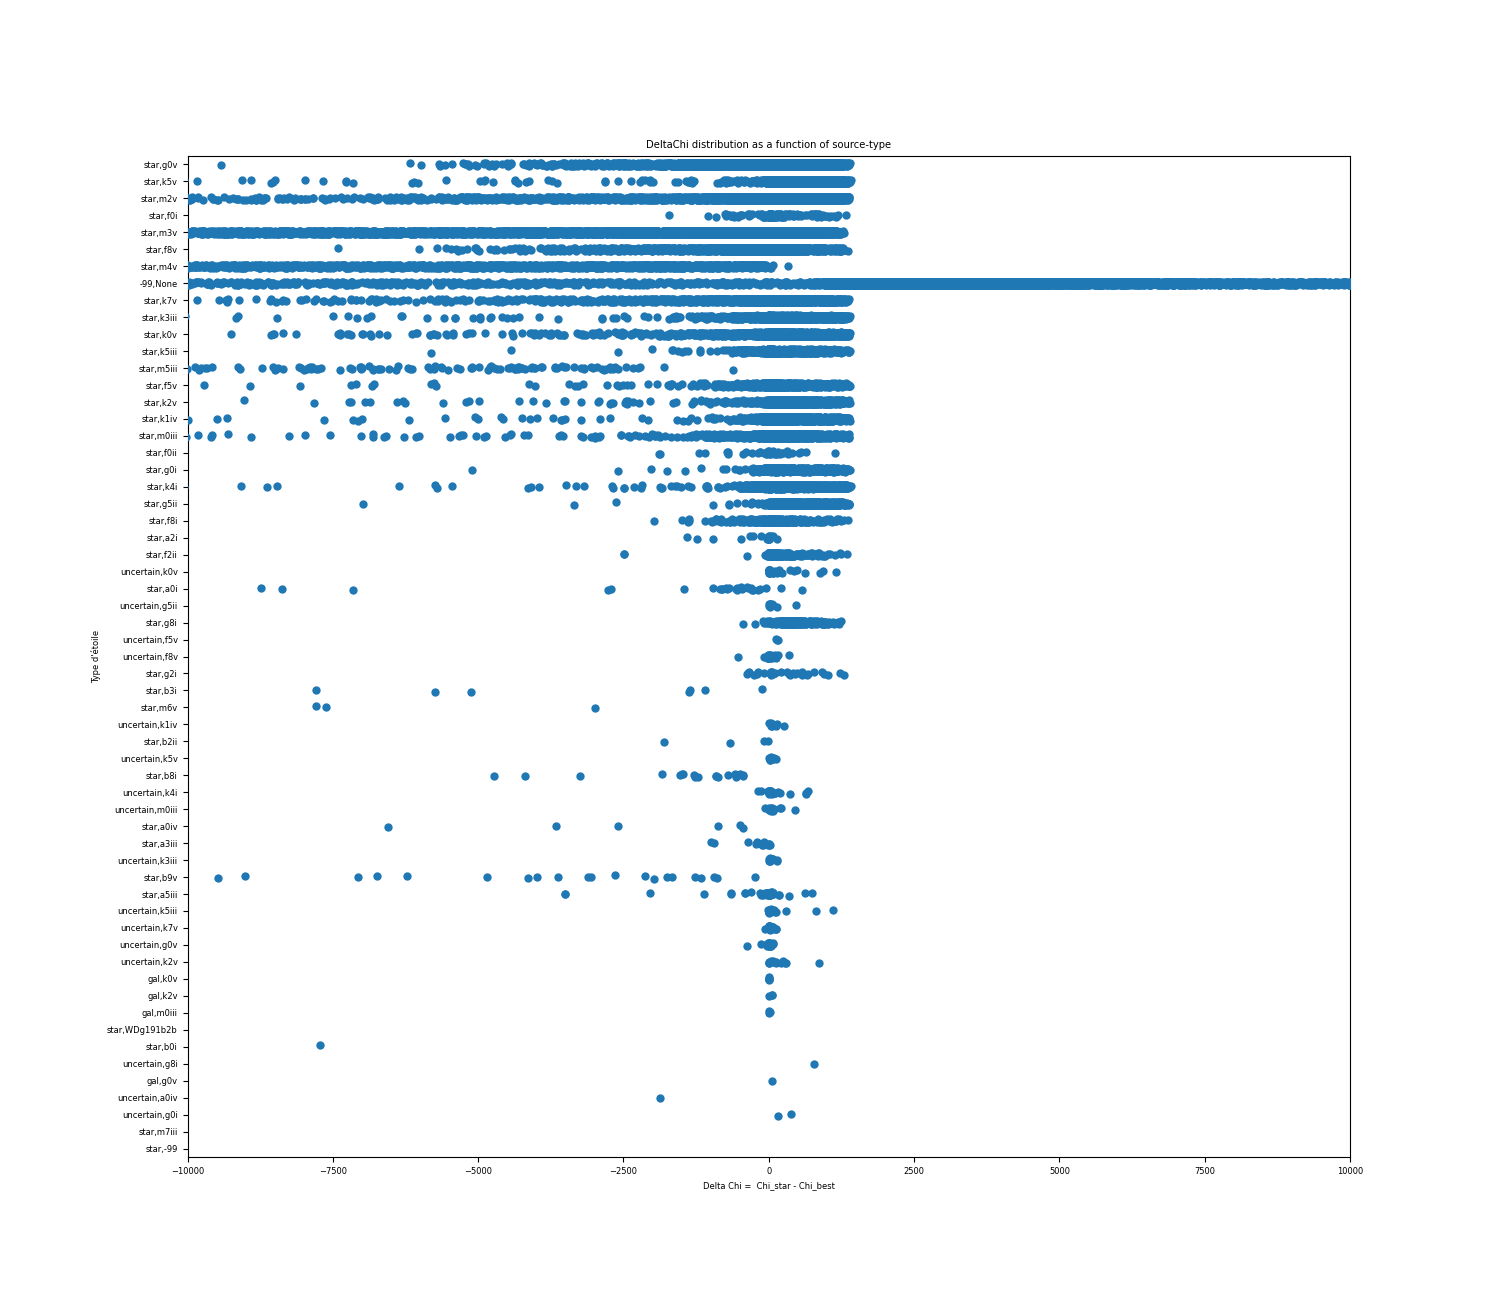

In [23]:
# Plot avec seaborn
plt.figure(figsize=(15,13))

sns.stripplot(x=zphota["CHI_STAR"]-zphota["CHI_BEST"], y=zphota["S_TYPE"], jitter=True, size=6)
plt.title("DeltaChi distribution as a function of source-type")
plt.ylabel("Type d'étoile")
plt.xlabel("Delta Chi =  Chi_star - Chi_best")
plt.xlim(-1e4,1e4)
plt.show()

/tmp/ipykernel_52331/4294281862.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/home/hallouin/miniconda3/envs/lephare/lib/python3.12/site-packages/ipympl/backend_nbagg.py:335: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.figure.savefig(buf, format='png', dpi='figure')


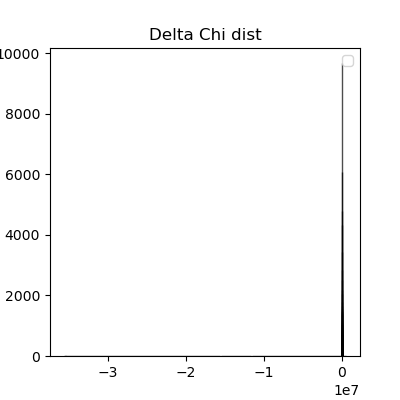

In [6]:
###Flag and type distribution

plt.figure(figsize=(4, 4))
mask=(zphota["CHI_STAR"]<1e4) & (zphota["CHI_BEST"]<1e4)
plt.hist(zphota["CHI_STAR"] - zphota["CHI_BEST"], bins=1000000, alpha=0.7, edgecolor='black')#, density=True)#, log=True)
plt.title("Delta Chi dist")


# plt.ylim(0,0.010)
plt.legend()
plt.show()